In [1]:
!pip install -U sentence-transformers
#!pip install -U scikit-learn

import pandas as pd
import nltk
import collections
import random 
from nltk.cluster import kmeans, cosine_distance, euclidean_distance
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.feature_selection import VarianceThreshold
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1', device='cuda')
#arreglar la sumplificacion de proc_og con su label. (one to many)

     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 3.1 MB 28.6 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=4d7fe060eb3993c0606c1e46756e0e853d09eea0161ea034656f98ad87bc3891
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.19
    Uninstalling huggingface-hub-0.0.19:
      Successfully uninstalled huggingface-hub-0.0.19
  Attempting uninstall: transformers
    Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [2]:
df = pd.read_csv("../input/clustered-df/clustered_df.csv", dtype=str)
#df.drop(columns=["Unnamed: 0"], inplace=True)
df["nostop_og2"] = df["nostop_og"]
df = df.groupby('nostop_og2').first().set_index('Unnamed: 0')
df


        
#arreglar el tema de los many to one

,proc_og,proc_res,nostop_og,nostop_res,og_id,res_id,label3,label4,label1
Unnamed: 0,,,,,,,,,
14569,Vamos !,? vamos ?,!,? ?,1360406699333603330,1360733855783788546,9,1,3
14033,Tengo varias ! pero sí !,Hace unos 10 años hubo una remake de la colec...,! !,"10 años remake colección , 30 y pico fascicul...",1350249120716492801,1350576619216371719,2,99,4
33531,"Yo menos ! Si ! monotributista , sin relac de...",y que te pusieron en el mail como motivo de l...,"! ! monotributista , relac dependencia , hosp...",y pusieron mail motivo cancelación turno ?,1362501942342205440,1362510566091337733,5,99,8
32346,"Si ! Que bien eso , viste . Esta vez es ciert...",Ojalá hubiesen empezado antes con la ' democr...,"! , viste . « Europa »",Ojalá hubiesen empezado ' democratización ' p...,1353117535894429696,1353121048791830529,4,99,2
37142,Es cierto ! De hecho hace solo 3 días dijo qu...,Hasta escribe mal hacerse . Ese sujeto habla ...,"! 3 "" INNECESARIAS "" y habló "" INMUNIDAD NATU...",escribe hacerse . sujeto vacunas ! farmacéuti...,1372689772909637633,1372694762436886528,6,0,6
...,...,...,...,...,...,...,...,...,...
23598,𝗠𝗶𝘀 𝘃𝗶𝗲𝗷𝗼𝘀 𝘃𝗮𝗰𝘂𝗻𝗮𝗱𝗼𝘀 Gracias Presidente Graci...,Dejen de felicitarse entre ustedes y laburen .,𝗠𝗶𝘀 𝘃𝗶𝗲𝗷𝗼𝘀 𝘃𝗮𝗰𝘂𝗻𝗮𝗱𝗼𝘀 Gracias Presidente Graci...,Dejen felicitarse y laburen .,1367202812699025408,1367540809785090048,8,99,4
36738,🏾De todos estos artefactos se puede esperar c...,Cabeza de termo quemada de tanto ingerir pole...,"🏾De artefactos esperar gansada , especialista...",Cabeza termo quemada ingerir polenta gorgojos...,1363188026843664385,1363198099724845056,1,99,4
33310,🏿jajaja Porque no tiene vacas,"Ummm , estás seguro ? a nombre de él no las t...",🏿jajaja vacas,"Ummm , estás seguro ? a nombre !",1359127259064500228,1359127590452174851,8,99,9


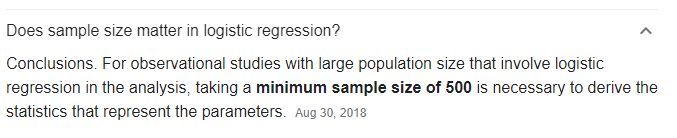

In [3]:
df2 = df.copy()
for i, val in enumerate(df2["label3"]):
    if not (val == "6" or val == "8"):
        df2["label3"][i] = "0"   
        


0.17081514686799576


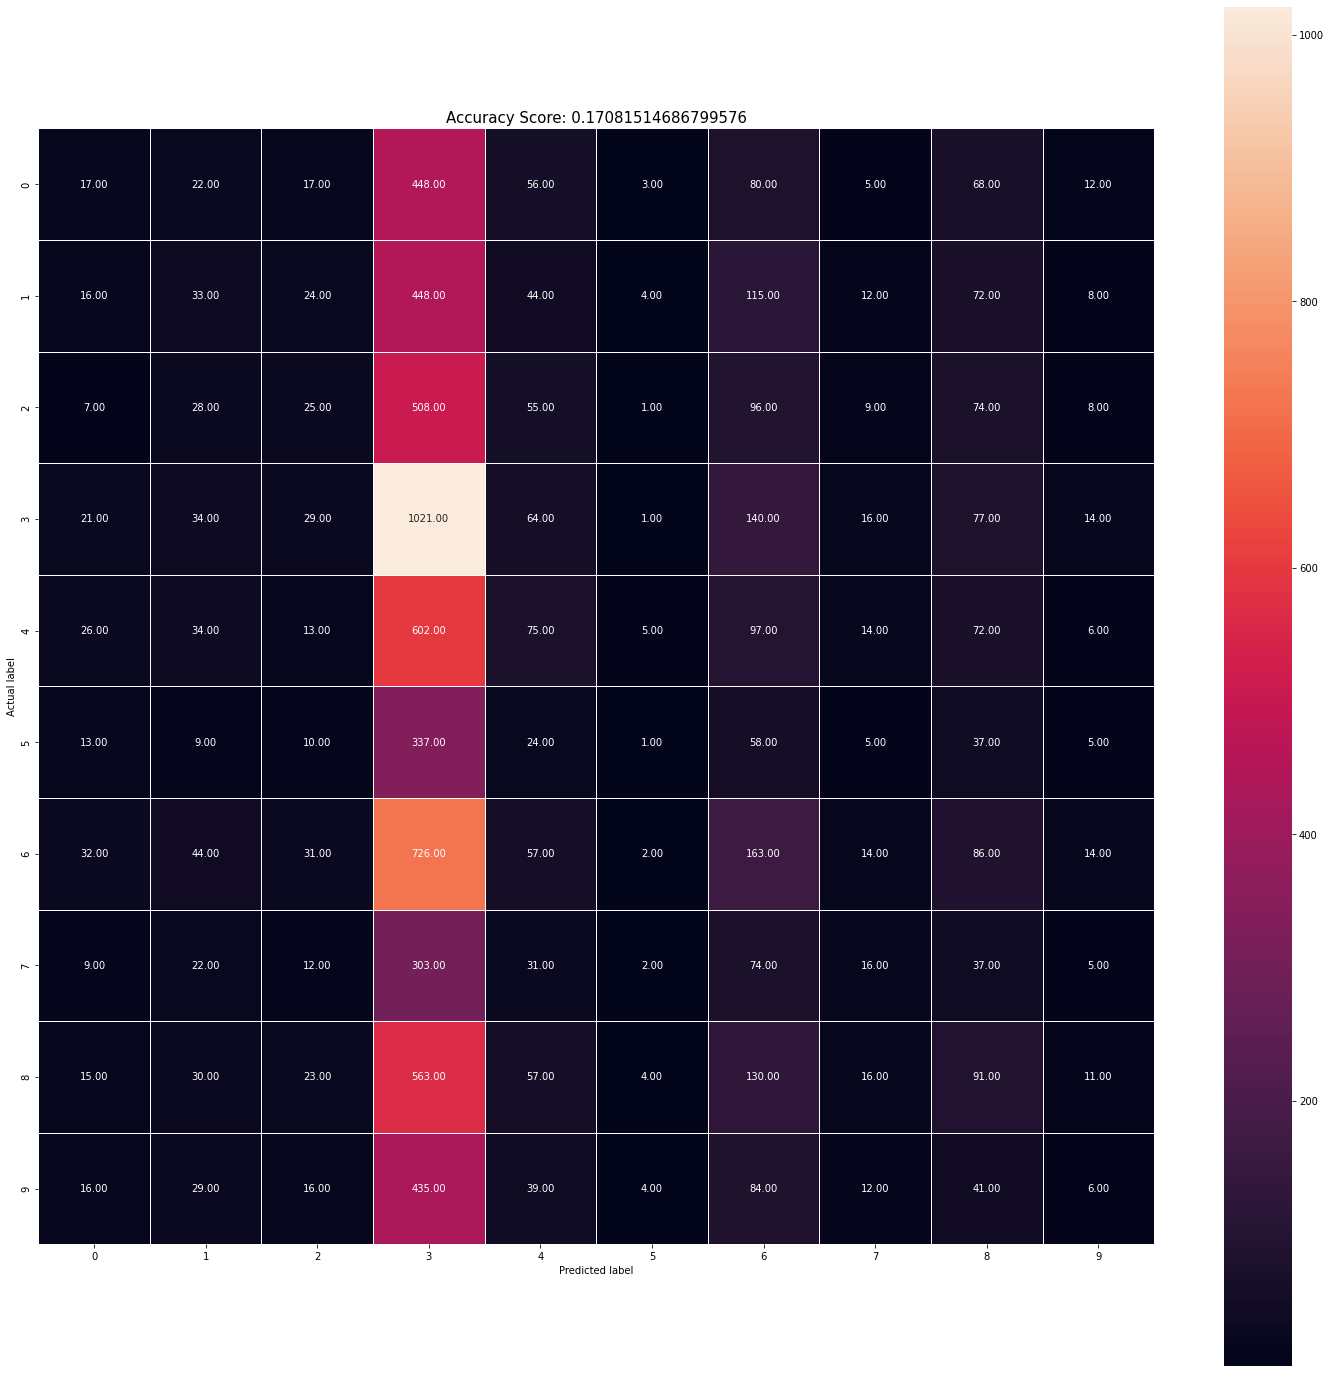

In [4]:
#muetra con un token count vectorizer y la label 3
cv=CountVectorizer() 
logisticRegr = LogisticRegression(solver='liblinear')

word_count_vector=cv.fit_transform(df["nostop_og"].astype('str'))
normed_matrix = normalize(word_count_vector, axis=1, norm='max')
dict_space = VarianceThreshold(threshold=1e-5).fit_transform(normed_matrix)
svd = TruncatedSVD(n_components=300)
red_emb = svd.fit_transform(dict_space.toarray())
X_train, X_test, y_train, y_test = train_test_split(red_emb, list(df["label1"]), random_state=2)
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
predictions = logisticRegr.predict(X_test)
print(score)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Batches:   0%|          | 0/485 [00:00<?, ?it/s]

0.17164091069953993


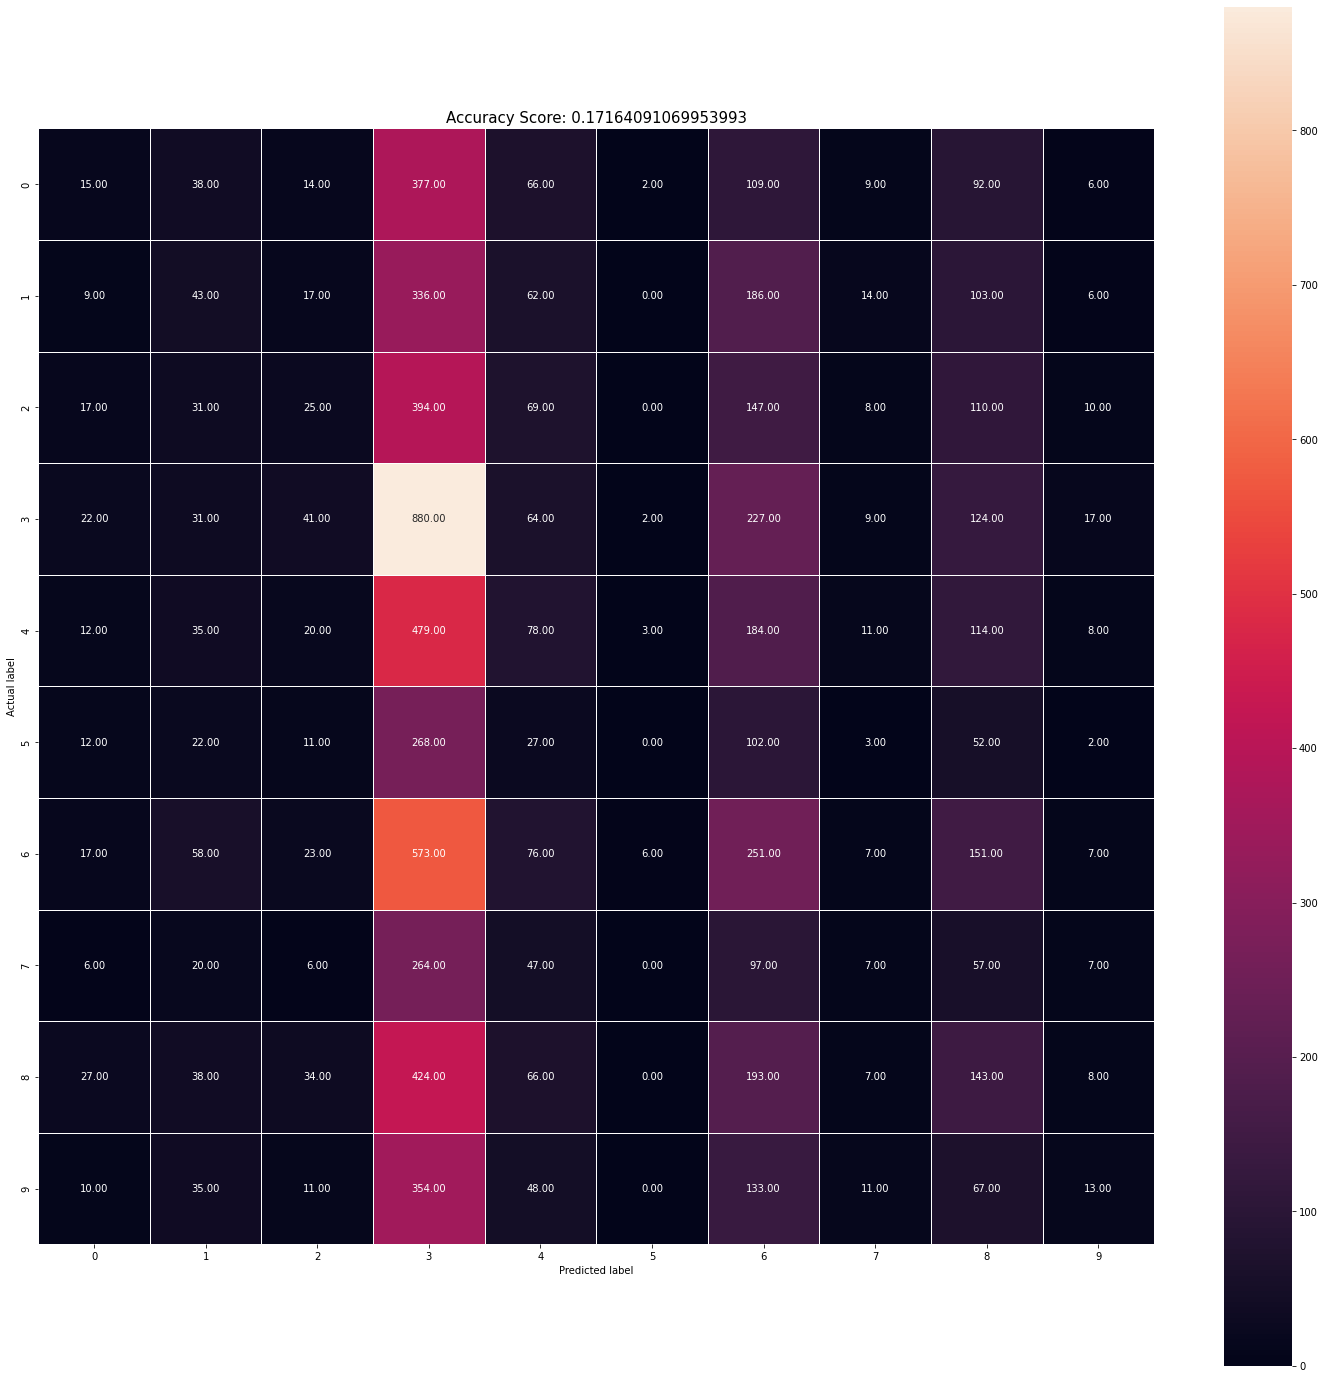

In [5]:
#segunda muestra con enbeddings SBERT
embedings = model.encode(list(df["proc_og"]), batch_size=70, show_progress_bar=True, convert_to_tensor=True, normalize_embeddings=True)
logisticRegr2 = LogisticRegression(solver='liblinear')


X_train2, X_test2, y_train2, y_test2 = train_test_split(embedings.cpu(), list(df["label1"]), random_state=2)
logisticRegr2.fit(X_train2, y_train2)
score2 = logisticRegr2.score(X_test2, y_test2)


print(score2)
predictions2 = logisticRegr2.predict(X_test2)
cm2 = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(25,25))
sns.heatmap(cm2, annot=True, fmt=".2f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);


0.24855491329479767


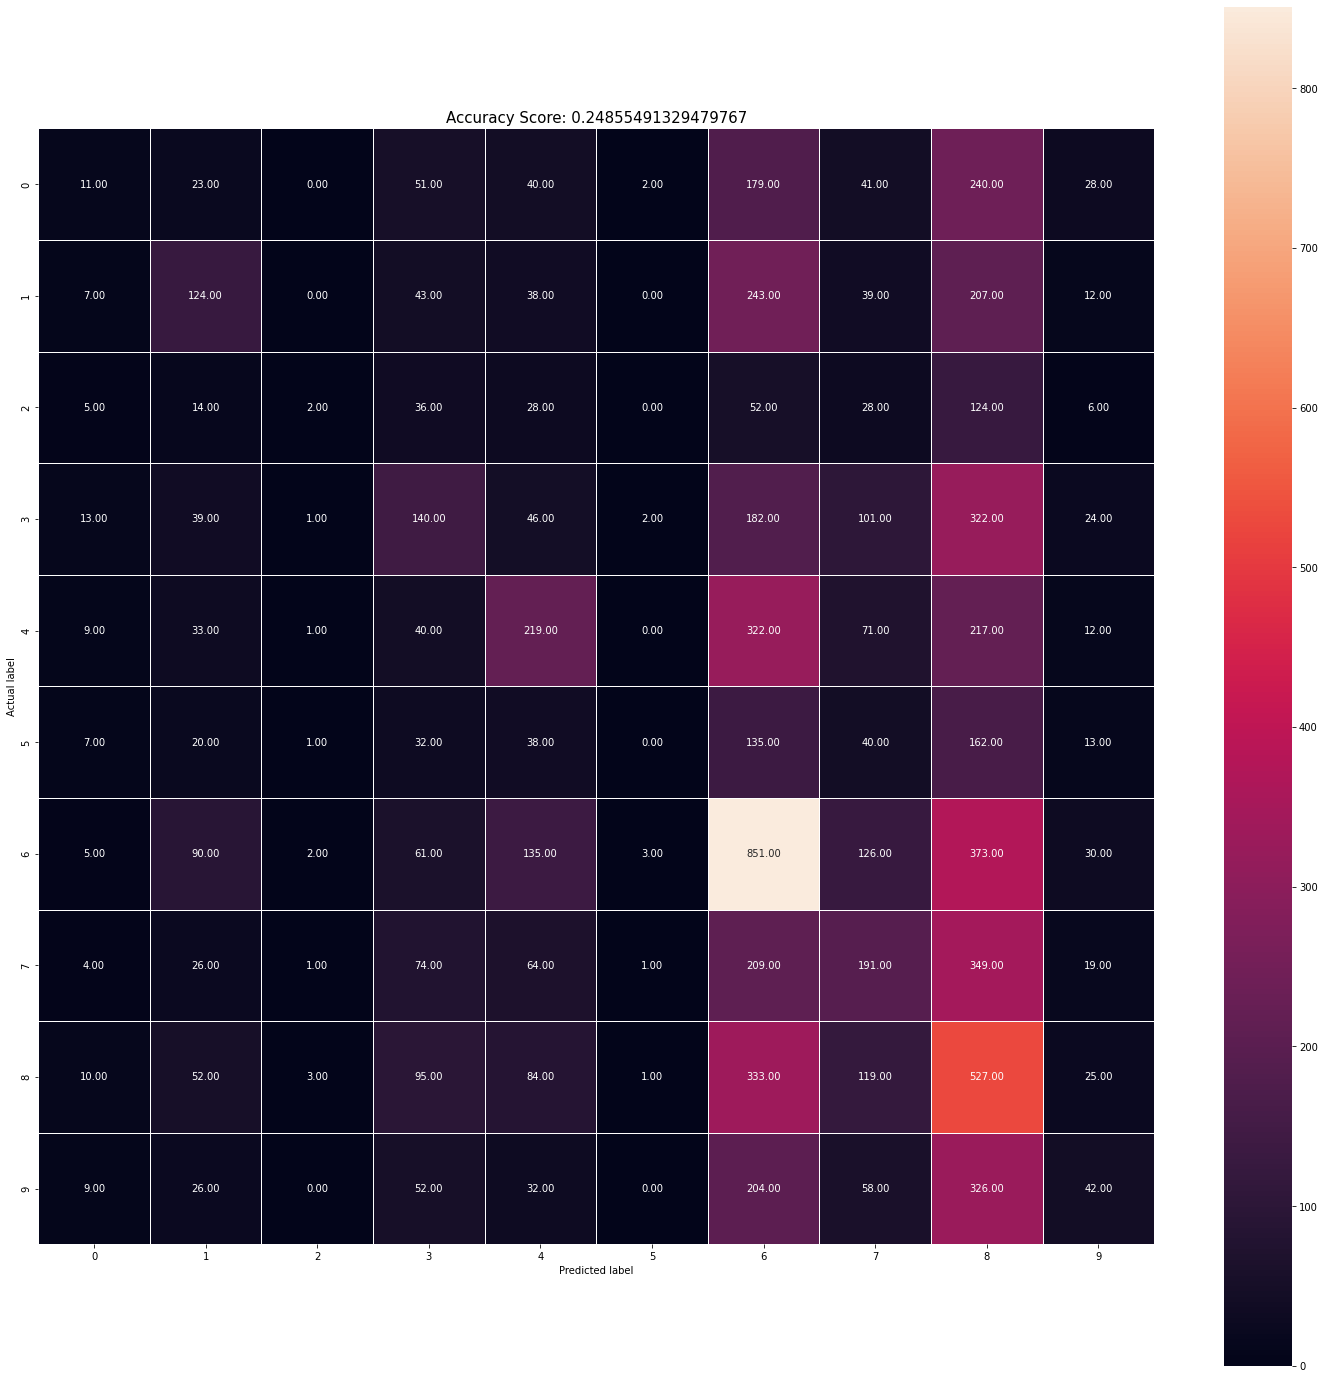

In [6]:
#Embedding TCV

cv=CountVectorizer() 
logisticRegr = LogisticRegression(solver='liblinear')

#creamos el espacio vectorial
word_count_vector=cv.fit_transform(df["nostop_og"].astype('str'))
normed_matrix = normalize(word_count_vector, axis=1, norm='max')
dict_space = VarianceThreshold(threshold=1e-5).fit_transform(normed_matrix)

#Reducimos a 300 dimensiones
svd = TruncatedSVD(n_components=300)
red_emb = svd.fit_transform(dict_space.toarray())

#dividimos 
X_train, X_test, y_train, y_test = train_test_split(red_emb, list(df["label3"]), random_state=2)

logisticRegr.fit(X_train, y_train)

#metricas para evaluar performance
score = logisticRegr.score(X_test, y_test)
predictions = logisticRegr.predict(X_test)


print(score)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

arreglar la sumplificacion de proc_og con su label. (one to many)

Batches:   0%|          | 0/485 [00:00<?, ?it/s]

0.2834729267429515


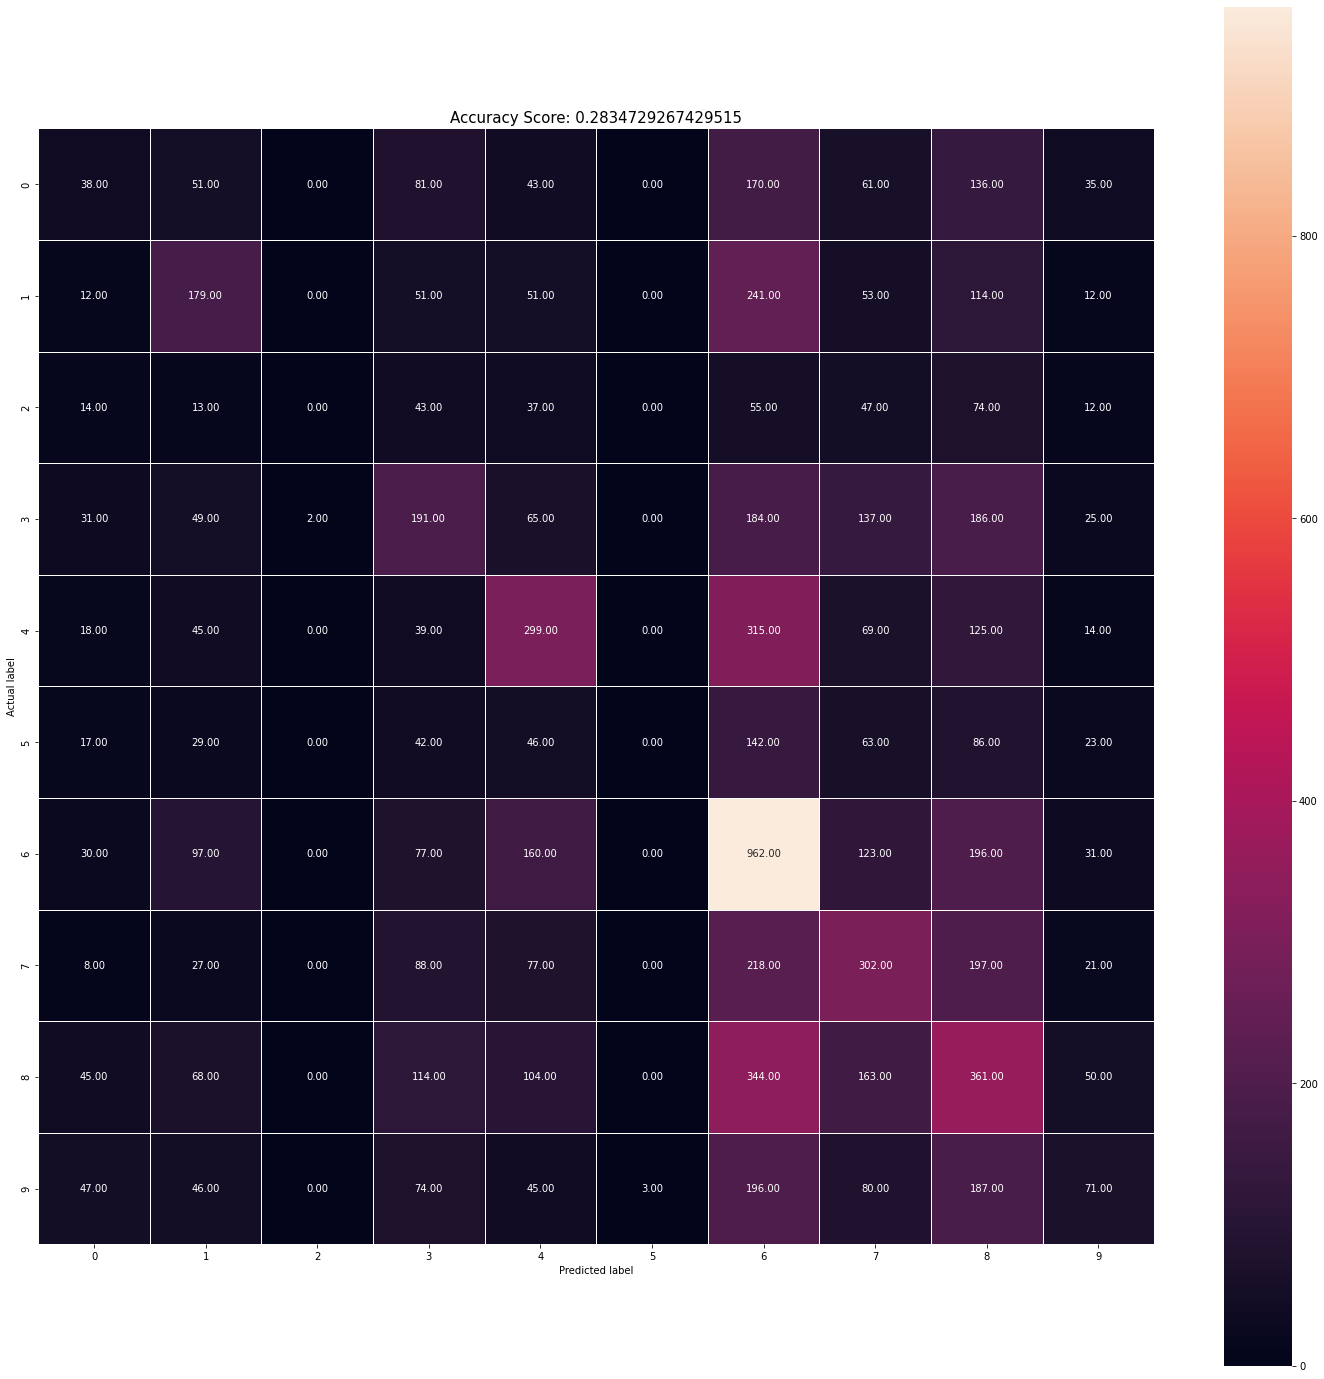

In [7]:
embedings = model.encode(list(df["proc_og"]), batch_size=70, show_progress_bar=True, convert_to_tensor=True, normalize_embeddings=True)
logisticRegr2 = LogisticRegression(solver='liblinear')


X_train2, X_test2, y_train2, y_test2 = train_test_split(embedings.cpu(), list(df["label3"]), random_state=2)
logisticRegr2.fit(X_train2, y_train2)
score2 = logisticRegr2.score(X_test2, y_test2)


print(score2)
predictions2 = logisticRegr2.predict(X_test2)
cm2 = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(25,25))
sns.heatmap(cm2, annot=True, fmt=".2f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);